In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = {
'Customer': ['A', 'B', 'C', 'D', 'E', 'F'],
'Income': [15, 16, 25, 45, 70, 85], # Annual Income in $000s
'SpendingScore': [39, 81, 6, 70, 77, 15] # Score from 1–100
}

In [4]:
df = pd.DataFrame(data)
df

,Customer,Income,SpendingScore
0,A,15,39
1,B,16,81
2,C,25,6
3,D,45,70
4,E,70,77
5,F,85,15


In [6]:
X = df[['Income', 'SpendingScore']]

In [7]:
model = KMeans(n_clusters=2, random_state=42)

In [11]:
df['Cluster'] = model.fit_predict(X)

In [12]:
df

,Customer,Income,SpendingScore,Cluster
0,A,15,39,0
1,B,16,81,1
2,C,25,6,0
3,D,45,70,1
4,E,70,77,1
5,F,85,15,0


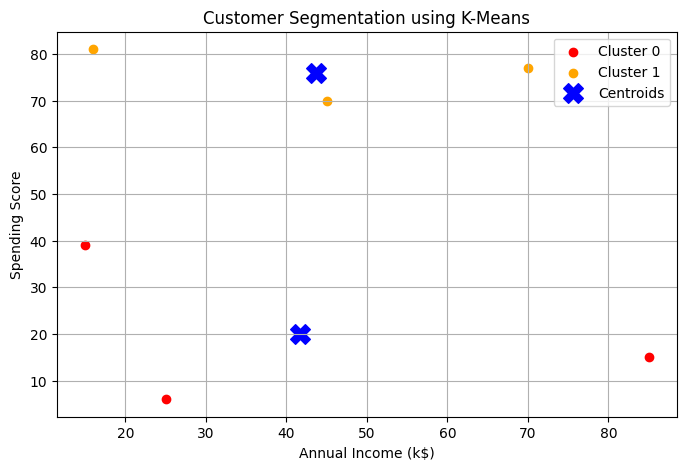

In [18]:
plt.figure(figsize=(8, 5))
colors = ['red', 'orange']
for cluster in range(2):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Income'], cluster_data['SpendingScore'],
    color=colors[cluster], label=f'Cluster {cluster}')
# Plot centroids
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='blue', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)